# Часть 1. Проверка гипотезы в Python и составление аналитической записки

Напомним, как выглядит гипотеза: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

По результатам анализа данных подготовьте аналитическую записку, в которой опишите:

Выбранный тип t-теста и уровень статистической значимости.

Результат теста, или p-value.

Вывод на основе полученного p-value, то есть интерпретацию результатов.

Одну или две возможные причины, объясняющие полученные результаты.

## Проверка гипотезы в Python и составление аналитической записки

## Цели и задачи проекта

Цель проекта проверить гипотезу о том, что пользователи Санкт-Петербурга проводит больше времени за чтением и прослушиванием книг в приложении Яндекс книги, чем пользователи Москвы

## Описание данных

https://code.s3.yandex.net/datasets/ab_test_participants.csv — таблица участников тестов.
- Структура файла:
- `user_id` — идентификатор пользователя;
- `group` — группа пользователя;
- `ab_test` — название теста;
- `device` — устройство, с которого происходила регистрация
- https://code.s3.yandex.net/datasets/ab_test_events.zip — архив с одним csv-файлом, в котором собраны события 2020 года;
- Структура файла:
- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время события;
- `event_name` — тип события;
- `details` — дополнительные данные о событии

## Содержимое проекта

**Часть 1. Проверка гипотезы в Python и составление аналитической записки**
1. Проверка гипотезы в Python и составление аналитической записки
2. Цели и задачи проекта
3. Описание данных
4. Содержимое проекта
5.1 Загрузка данных и знакомство с ними
6.2 Проверка гипотезы в Python
7.3 Аналитическая записка

**Часть 2. Анализ результатов А/В-тестирования**

8.1 Опишите цели исследования

9.2 Загрузите данные, оцените их целостность

10.3 По таблице ab_test_participants оцените корректность проведения теста

11.4 Проведите оценку результатов A/B-тестирования

## 1. Загрузка данных и знакомство с ними

In [3]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [10]:
# Выгружаем данные
df = pd.read_csv('/datasets/yandex_knigi_data.csv')

# Выводим первые строки датафрейма на экран
df.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [11]:
# Устанавливаем столбец 'Unnamed: 0' в качестве индекса
df = df.set_index('Unnamed: 0')

In [12]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8784 non-null   object 
 1   puid    8784 non-null   int64  
 2   hours   8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 274.5+ KB


Исходя из данных, в датафрейме пропусков нет

In [13]:
# Выводим информацию о дубликатах
df.duplicated(['puid']).sum()

244

Исходя из полученных данных видим наличие **244 дубликата**

In [14]:
# Удаляем дубликаты
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated(subset=['puid']).sum()

244

In [15]:
# Отсортируем всю таблицу и удалим неявные дубликаты
df = df.sort_values(by=['puid']).drop_duplicates(subset=['puid'], keep='last', ignore_index=True)

In [16]:
# Проверим
df.duplicated(subset=['puid']).sum()

0

В DataFrame 8784 записи, пропусков нет
В датафрейме 3 столбца, после того, как столбец `Unnamed: 0` заиндексировали :
- столбец `city` с типом float64;
- столбец `puid` с типом int64;
- столбец `hours` с типом object

Было 244 дубликата в столбце `puid`

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуйте статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

## 3. Аналитическая записка
По результатам анализа данных подготовьте аналитическую записку, в которой опишете:

- Выбранный тип t-теста и уровень статистической значимости.

- Результат теста, или p-value.

- Вывод на основе полученного p-value, то есть интерпретацию результатов.

- Одну или две возможные причины, объясняющие полученные результаты.



In [9]:
# Найдем уникальные значения по городам
df.city.value_counts()

Москва             6110
Санкт-Петербург    2430
Name: city, dtype: int64

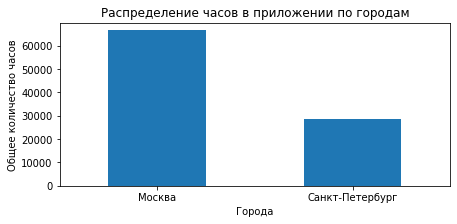

In [10]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Группируем данные по городам и суммируем количество часов
city_hours = df.groupby('city')['hours'].sum()

# Строим столбчатую диаграмму
city_hours.plot(
    kind='bar',  # Тип графика — столбчатая диаграмма
    rot=0,  # Градус вращения подписи по оси X
    legend=False,  # Выключаем легенду
    title='Распределение часов в приложении по городам'
)

# Настраиваем оформление графика
plt.xlabel('Города')
plt.ylabel('Общее количество часов')

# Выводим график
plt.show()

<Figure size 504x144 with 0 Axes>

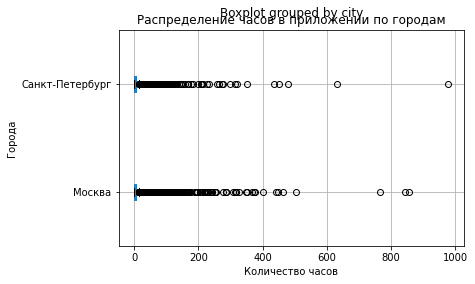

In [11]:
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбцах
# Группируем данные по городам и строим boxplot для каждого города
df.boxplot(column='hours', by='city', vert=False)

# Добавляем заголовок и метки осей
plt.title('Распределение часов в приложении по городам')
plt.xlabel('Количество часов')
plt.ylabel('Города')

# Выводим график
plt.show()

По диаграмме размаха могу отметить, что выбросов небольшое количество и мной решено выполнить с помощью теста Стьюдента

In [12]:
# Выборка средних заказов для группы А (Москва)
sample_a = df[df['city'] == 'Москва']['hours']
# Выборка средних заказов для группы B (Санкт-Петербург)
sample_b = df[df['city'] == 'Санкт-Петербург']['hours']

# Проводим t-тест с правосторонней альтернативой
test_result = ttest_ind(
    sample_a,
    sample_b,
    alternative='greater'  # Проверяем, что mu_b > mu_a
)

# Фиксируем уровень значимости
alpha = 0.05

# Интерпретируем результаты теста
if test_result.pvalue > alpha:
    print(f'p-value={test_result.pvalue} > {alpha}')
    print('Не получилось отвергнуть нулевую гипотезу: нет оснований утверждать, что среднее время активности в Санкт-Петербурге статистически значимо больше, чем в Москве.')
else:
    print(f'p-value={test_result.pvalue} < {alpha}')
    print('Отвергаем нулевую гипотезу: среднее время активности в Санкт-Петербурге статистически значимо больше, чем в Москве.')

p-value=0.8151395751256407 > 0.05
Не получилось отвергнуть нулевую гипотезу: нет оснований утверждать, что среднее время активности в Санкт-Петербурге статистически значимо больше, чем в Москве.


Исходя из результатов, можем сделать вывод, что нулевая гипотеза подтверждена

Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается

Так как исследовалась гипотеза о средних значениях из 2 выборок, использовался t-тест Стьюдента.

Уровень значимости - 5%.

Рассчитанный p-value - 0.82, выше уровня статистической значимости, следовательно не можем принять альтернативную гипотезу.

То есть, выборочные средние в двух группах не различаются или различия не статистически значимы.

Исходя из результатов, можем сделать вывод, что нулевая гипотеза подтверждена

Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается

----

# Часть 2. Анализ результатов A/B-тестирования

Теперь вам нужно проанализировать другие данные. Представьте, что к вам обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Ваша задача — провести оценку результатов A/B-теста. В вашем распоряжении:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализируйте его результаты.

## 1. Опишите цели исследования.



**Цель исследования** заключается в том, чтобы проверить новую версию сайта , которая повысит количество пользователей, совершивших покупку

## 2. Загрузите данные, оцените их целостность.


In [18]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [19]:
# Выводим информацию о датафрейме participants
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


Пропусков нет, можем работать дальше

In [20]:
# Выводим информацию о датафрейме events
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


Видим, что есть пропуски в столбце `details`, а именно 538264 пропуска, что составляет 68% от значений в данном столбце

In [21]:
# Выводим первые строки датафрейма participants на экран
participants.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [22]:
# Просмотрим данные в датафрейме events
display(participants)

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
...,...,...,...,...
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC
14522,FFF28D02B1EACBE1,B,recommender_system_test,PC
14523,FFF28D02B1EACBE1,B,interface_eu_test,PC


In [23]:
# Выводим первые строки датафрейма events на экран
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [24]:
# Просмотрим данные в датафрейме events
display(events)

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN
...,...,...,...,...
787281,1A655C280B064708,2020-12-31 23:57:44,product_page,NaN
787282,B77B2F4BCA134618,2020-12-31 23:58:23,registration,0.0
787283,GLOBAL,2020-12-31 23:58:30,product_cart,NaN
787284,B12AD1623E494FAD,2020-12-31 23:58:34,registration,-6.52


In [25]:
# Проверяем на дубликаты датафрейм participants
participants.duplicated().sum()

0

In [26]:
# Проверяем на дубликаты датафрейм events
events.duplicated().sum()

36318

In [27]:
# Удалим дубликаты
events = events.drop_duplicates().reset_index(drop=True)
events.duplicated().sum()

0

## 3. По таблице `ab_test_participants` оцените корректность проведения теста:

   3\.1 Выделите пользователей, участвующих в тесте, и проверьте:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [28]:
# Рассчитаем количество пользователей в каждой группе и тесте
display(participants.groupby(['ab_test', 'group']).size())

# Рассчитаем распределение по устройствам
display(participants['device'].value_counts())

ab_test                  group
interface_eu_test        A        5383
                         B        5467
recommender_system_test  A        2747
                         B         928
dtype: int64

Android    6484
PC         3717
iPhone     2858
Mac        1466
Name: device, dtype: int64

In [24]:
# Посчитаем количество уникальных пользователей

participants[participants['ab_test'] == 'interface_eu_test']['user_id'].nunique(), participants[participants['ab_test'] == 'recommender_system_test']['user_id'].nunique()

(10850, 3675)

In [25]:
# Проверим есть ли пользователи, которые попали в обе группы
interface_eu_test = participants[participants['ab_test'] == 'interface_eu_test']['user_id']
recommender_system_test = participants[participants['ab_test'] == 'recommender_system_test']['user_id']

intersection = list(set(interface_eu_test) & set(recommender_system_test))
print(intersection)

['94464DF2E5398E26', '65F225074FEC2C03', 'C33D8C1C81C7AA23', '6610064A4B2303D1', '4CCE583A34A8362C', 'FBF31896CD930197', 'EB215155BA578253', '902F92052587344F', '59D9BD2A3172D3F4', '3A6D88AB973BD99D', '9E0A3633886C080E', '573EF5CB449265BE', 'F7BAFF2E0A04F11B', 'DA2880E43566AF12', '2AE10F8C21B66E8E', 'DA4D24731C8CCEB8', 'E68B2613255FA585', 'CCAF138D12385DF2', '6ED57949BDA6D94E', 'B7DBE079E5AB148E', 'EC998D82E096033B', 'AA5A1803D3FA76B4', '49C45D71BDCE2F69', 'EC9E9E250559033B', 'F1B93BAE75EE0FB2', '84C13EFBE76DF52F', '1E8855206E49EFF8', '65A30CEC01FAB999', 'E3481D64A20DA394', 'FE8F9858BBE502D9', '48BEDF1889241425', '38189578561F38CB', '9266418A9D2FA813', '3F52D53AB33C9FD6', 'E0EEE04D9FDB4931', 'D18A013DBEEB0951', 'C6C4C814B7B202E7', 'E7F87F9FBA3269B1', '75654D851F8C8F59', 'C5AD06762E628169', '23E633E92EDCD195', '2FCC63EB9CB798BF', '1073D7DFF1BBE8BB', 'C8BDDF5639850737', 'B150C94FFD64D8B0', 'C89E24F4C723CEF4', 'CD77B10F620BEABA', 'A3BEB02A027BA3C4', '4F37FAAD74FB679C', 'B60B4563ADC259E3',

In [26]:
# Удалим этих пользователей
participants = participants[~participants['user_id'].isin(intersection)]

In [27]:
# Повторная проверка
interface_eu_test = participants[participants['ab_test'] == 'interface_eu_test']['user_id']
recommender_system_test = participants[participants['ab_test'] == 'recommender_system_test']['user_id']

intersection = list(set(interface_eu_test) & set(recommender_system_test))
print(intersection)

[]


Видим, что пересечений больше нет

In [28]:
# Создаём новый DataFrame, содержащий только строки с ab_test == 'interface_eu_test'
interface_eu_test_df = participants[participants['ab_test'] == 'interface_eu_test']
interface_eu_test_df

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android
7,0031F1B5E9FBF708,A,interface_eu_test,Android
...,...,...,...,...
14518,FFE5B14BD55C1C5C,A,interface_eu_test,PC
14519,FFE600EEC4BA7685,B,interface_eu_test,Android
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC


In [29]:
unique_users = interface_eu_test_df['user_id'].unique()
unique_users

array(['0002CE61FF2C4011', '001E72F50D1C48FA', '002412F1EB3F6E38', ...,
       'FFE7FC140521F5F6', 'FFEFC0E55C1CCD4F', 'FFF58BC33966EB51'],
      dtype=object)

In [30]:
interface_eu_test_df[interface_eu_test_df['ab_test'] == 'interface_eu_test']['user_id'].nunique()

9963

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [31]:
test_df = pd.merge(interface_eu_test_df, events, on='user_id', how='inner')
test_df

,user_id,group,ab_test,device,event_dt,event_name,details
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38
1,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:49,login,NaN
2,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:57,login,NaN
3,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:38:54,login,NaN
4,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-08 22:15:35,login,NaN
...,...,...,...,...,...,...,...
68069,FFEFC0E55C1CCD4F,A,interface_eu_test,PC,2020-12-13 23:52:22,login,NaN
68070,FFEFC0E55C1CCD4F,A,interface_eu_test,PC,2020-12-28 00:29:10,login,NaN
68071,FFF58BC33966EB51,A,interface_eu_test,Android,2020-12-13 17:37:34,registration,-0.45
68072,FFF58BC33966EB51,A,interface_eu_test,Android,2020-12-13 17:56:02,login,NaN


In [32]:
# Это я для себя проверяю данные в столбце
unique_event_name = test_df['event_name'].unique()
unique_event_name

array(['registration', 'login', 'product_page', 'product_cart',
       'purchase'], dtype=object)

- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [33]:
# Отберём только тех пользователей, у которых есть покупка
test_df = test_df[test_df['event_name'].isin(['registration', 'purchase'])]
test_df

,user_id,group,ab_test,device,event_dt,event_name,details
0,0002CE61FF2C4011,B,interface_eu_test,Mac,2020-12-07 04:37:31,registration,-2.38
11,001E72F50D1C48FA,A,interface_eu_test,Mac,2020-12-17 15:44:05,registration,-3.61
18,002412F1EB3F6E38,B,interface_eu_test,Mac,2020-12-09 09:36:50,registration,-0.48
24,002540BE89C930FB,B,interface_eu_test,Android,2020-12-08 18:06:07,registration,-2.38
31,0031F1B5E9FBF708,A,interface_eu_test,Android,2020-12-14 00:47:10,registration,-2.26
...,...,...,...,...,...,...,...
68056,FFE7FC140521F5F6,A,interface_eu_test,PC,2020-12-23 09:10:16,registration,-3.43
68063,FFE7FC140521F5F6,A,interface_eu_test,PC,2020-12-26 14:37:21,purchase,4.49
68065,FFE7FC140521F5F6,A,interface_eu_test,PC,2020-12-26 14:37:51,purchase,4.49
68068,FFEFC0E55C1CCD4F,A,interface_eu_test,PC,2020-12-13 23:52:15,registration,0.0


In [34]:
# Создадим отдельные датафреймы группы А и группы В
test_df_a = test_df[test_df['group'] == 'A']
test_df_b = test_df[test_df['group'] == 'B']

In [35]:
# Проверим наличение пересечений между группами
intersection = list(set(test_df_a['user_id']) & set(test_df_b['user_id']))

display(intersection)

[]

Видим, что пересечений нет

In [36]:
# Оценим размеры групп
len(test_df_a)

8601

In [37]:
# Оценим размеры групп
len(test_df_b)

10263

In [43]:
# Столбец с датой регистрации
reg_date = test_df.groupby('user_id')['event_dt'].min().reset_index()
reg_date.columns = ['user_id', 'registration_dt']

# Сличение данных с данными о регистрации
test_df = test_df.merge(reg_date, on='user_id')

# Фильтр семь дней
test_df = test_df[(test_df['event_dt'] - test_df['registration_dt']) <= pd.Timedelta(days=7)]

print(test_df)

                user_id group            ab_test   device            event_dt  \
0      0002CE61FF2C4011     B  interface_eu_test      Mac 2020-12-07 04:37:31   
1      001E72F50D1C48FA     A  interface_eu_test      Mac 2020-12-17 15:44:05   
2      002412F1EB3F6E38     B  interface_eu_test      Mac 2020-12-09 09:36:50   
3      002540BE89C930FB     B  interface_eu_test  Android 2020-12-08 18:06:07   
4      0031F1B5E9FBF708     A  interface_eu_test  Android 2020-12-14 00:47:10   
...                 ...   ...                ...      ...                 ...   
18859  FFE7FC140521F5F6     A  interface_eu_test       PC 2020-12-23 09:10:16   
18860  FFE7FC140521F5F6     A  interface_eu_test       PC 2020-12-26 14:37:21   
18861  FFE7FC140521F5F6     A  interface_eu_test       PC 2020-12-26 14:37:51   
18862  FFEFC0E55C1CCD4F     A  interface_eu_test       PC 2020-12-13 23:52:15   
18863  FFF58BC33966EB51     A  interface_eu_test  Android 2020-12-13 17:37:34   

         event_name details

Различия есть, но это некритично

Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [30]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2 # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
p = 0.30 # Базовый уровень доли
mde=0.03  # Минимальный детектируемый эффект
effect_size = proportion_effectsize (p, p + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 3761


Для определения достаточного размера выборки нам необходимо 3761 пользователей для каждой из групп.

Так как групп 2, всего потребуется 7522 пользователей (у нас это количество есть)

- рассчитайте для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [44]:
# группа A
test_df_a = test_df[test_df['group'] =='A']

In [45]:
# количество уникальных пользователей в группе A
a_uniq = test_df_a['user_id'].nunique()
a_uniq

4952

In [46]:
# количество уникальных пользователей в группе A,
# совершивших покупку (в течение 7 дней после регистрации)
a_purch = test_df_a[test_df_a['event_name']== 'purchase']['user_id'].nunique()
a_purch

1377

In [47]:
# Рассчитаем долю пользователей, совершивших покупку (конверсию) для группы A 
cr_a = round(a_purch/a_uniq ,3)
cr_a

0.278

In [49]:
# группа B
test_df_b = test_df[test_df['group'] =='B']

In [55]:
# количество уникальных пользователей в группе B
b_uniq = test_df_b['user_id'].nunique()
b_uniq

5011

In [56]:
# количество уникальных пользователей в группе B,
# совершивших покупку (в течение 7 дней после регистрации)
b_purch = test_df_b[test_df_b['event_name']== 'purchase']['user_id'].nunique()
b_purch

1480

In [59]:
# Рассчитаем долю пользователей, совершивших покупку (конверсию) для группы B 
cr_b = round(b_purch/b_uniq ,3)
cr_b

0.295

In [60]:
# рассчитаем разницу конверсий между группами 
cr_diff = round(100 * (cr_b - cr_a),3 )
cr_diff

1.7

- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

Как видим, конверсия в тестовой группе на 1.7% выше, чем в контрольной

## 4. Проведите оценку результатов A/B-тестирования:

- Проверьте изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

Так как анализируем изменение в метрике доли (конверсию),потребуется использовать Z-тест пропорций

H0: конверсия зарегистрированных пользователей в покупателей для двух групп не различается или различия не статистически значимы или равны

сr_b = cr_a

H1: конверсия зарегистрированных пользователей в покупателей для двух групп различается или различия статистически значимы или конверсия в тестовой группе не выше, чем в офрмальной

сr_b > cr_a

In [62]:
# количество покупателей 
m_a = a_purch
m_b = b_purch


# размеры выборок 
n_a = a_uniq
n_b = b_uniq

# определим уровень значимости 
alpha = 0.05

stat_ztest, p_value_ztest = proportions_ztest(
    [m_a, m_b],
    [n_a, n_b],
    alternative = 'smaller'
)


if p_value_ztest > alpha:
    print(f'pvalue={p_value_ztest} > {alpha}')
    print('Нулевая гипотеза находит подтверждение')
else:
    print(f'pvalue={p_value_ztest} < {alpha}')
    print('Альтернативная гипотеза находит подтверждение')

pvalue=0.01133245942807192 < 0.05
Альтернативная гипотеза находит подтверждение


- Опишите выводы по проведённой оценке результатов A/B-тестирования. Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

Как видим, рассчитанные p_value ниже уровня значимости, то есть есть основания для принятия альтернативной гипотезы.

То есть, рост конверсии в тестовой группе на 1,7% может быть объяснен изменением дизайна сайта, но НЕ достигнут целевой показатель роста конверсии в 3%.

Рекомендации:

- Провести дополнительный анализ по сегментам — возможно, новый интерфейс работает лучше для отдельных групп (мобильные пользователи, новички и т.д.);
- Запустить дополнительные A/B-тесты с другими UX-гипотезами: добавление подсказок, этапов онбординга, изменения CTA;
- Изучить поведение пользователей воронки после регистрации — где именно теряется интерес;
- Собрать качественную обратную связь от пользователей — чтобы понять, какие барьеры мешают сделать покупку;
- Сфокусироваться на других точках роста, например, на продлении LTV, повышении Retention или улучшении маркетингового взаимодействия.